## Model Training



In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import warnings
import pickle

In [187]:
df=pd.read_csv('Predictive_Maintenance_Model.csv')
df.head()

,Unnamed: 0,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Temperature Difference,Power,Mean Temperature,Wear strain
0,0,1,0.304348,0.358025,0.222934,0.535714,0.000000,0,0.644444,0.622557,0.331395,0.000000
1,1,2,0.315217,0.370370,0.139697,0.583791,0.011858,0,0.644444,0.609161,0.343023,0.008420
2,2,2,0.304348,0.345679,0.192084,0.626374,0.019763,0,0.622222,0.708143,0.325581,0.014972
3,3,2,0.315217,0.358025,0.154249,0.490385,0.027668,0,0.622222,0.512694,0.337209,0.016761
4,4,2,0.315217,0.370370,0.139697,0.497253,0.035573,0,0.644444,0.509509,0.343023,0.021822


In [188]:
df['Machine failure'].value_counts()

Machine failure
0    9652
2     106
4      98
3      83
1      42
5      19
Name: count, dtype: int64

In [189]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [190]:
X = df.drop(columns=['Machine failure'],axis=1)
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Temperature Difference,Power,Mean Temperature,Wear strain
0,1,0.304348,0.358025,0.222934,0.535714,0.000000,0.644444,0.622557,0.331395,0.000000
1,2,0.315217,0.370370,0.139697,0.583791,0.011858,0.644444,0.609161,0.343023,0.008420
2,2,0.304348,0.345679,0.192084,0.626374,0.019763,0.622222,0.708143,0.325581,0.014972
3,2,0.315217,0.358025,0.154249,0.490385,0.027668,0.622222,0.512694,0.337209,0.016761
4,2,0.315217,0.370370,0.139697,0.497253,0.035573,0.644444,0.509509,0.343023,0.021822


In [191]:
y = df['Machine failure']
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Machine failure, Length: 10000, dtype: int64

In [192]:
X.shape

(10000, 10)

In [193]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((8000, 10), (2000, 10))

## Logistic Regression

In [194]:
LR_clf = LogisticRegression()

# Train the model
LR_clf.fit(X_train, y_train)

# Evaluate the model
y_pred = LR_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9695
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1935
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        16
           4       0.70      0.39      0.50        18
           5       0.00      0.00      0.00         6

    accuracy                           0.97      2000
   macro avg       0.28      0.23      0.25      2000
weighted avg       0.95      0.97      0.96      2000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

## Decision Tree Classifier

In [195]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)


y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9835
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1935
           1       0.09      0.10      0.10        10
           2       0.88      1.00      0.94        15
           3       1.00      1.00      1.00        16
           4       1.00      0.94      0.97        18
           5       0.00      0.00      0.00         6

    accuracy                           0.98      2000
   macro avg       0.66      0.67      0.67      2000
weighted avg       0.98      0.98      0.98      2000



## Random Forest Classifier

In [196]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9905
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1935
           1       0.00      0.00      0.00        10
           2       0.94      1.00      0.97        15
           3       0.94      1.00      0.97        16
           4       0.90      1.00      0.95        18
           5       0.00      0.00      0.00         6

    accuracy                           0.99      2000
   macro avg       0.63      0.67      0.65      2000
weighted avg       0.98      0.99      0.99      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Support Vector Machine

In [197]:
# Initialize and train SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)


y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.971
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1935
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        15
           3       1.00      0.06      0.12        16
           4       1.00      0.33      0.50        18
           5       0.00      0.00      0.00         6

    accuracy                           0.97      2000
   macro avg       0.50      0.23      0.27      2000
weighted avg       0.96      0.97      0.96      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## AdaBoost Classifier

In [198]:
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1935
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        15
           3       0.80      1.00      0.89        16
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         6

    accuracy                           0.98      2000
   macro avg       0.30      0.33      0.31      2000
weighted avg       0.95      0.98      0.96      2000

[[1935    0    0    0    0    0]
 [  10    0    0    0    0    0]
 [  15    0    0    0    0    0]
 [   0    0    0   16    0    0]
 [  14    0    0    4    0    0]
 [   6    0    0    0    0    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Gradient Boosting Classifier

In [199]:

gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1935
           1       0.00      0.00      0.00        10
           2       0.94      1.00      0.97        15
           3       1.00      1.00      1.00        16
           4       1.00      0.94      0.97        18
           5       0.00      0.00      0.00         6

    accuracy                           0.99      2000
   macro avg       0.65      0.66      0.66      2000
weighted avg       0.98      0.99      0.99      2000

[[1929    1    1    0    0    4]
 [  10    0    0    0    0    0]
 [   0    0   15    0    0    0]
 [   0    0    0   16    0    0]
 [   1    0    0    0   17    0]
 [   6    0    0    0    0    0]]


To solve imbalance data by using SMOTE technique

In [200]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)


y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.9705
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1935
           1       0.09      0.30      0.13        10
           2       0.88      0.93      0.90        15
           3       1.00      1.00      1.00        16
           4       0.94      0.94      0.94        18
           5       0.00      0.00      0.00         6

    accuracy                           0.97      2000
   macro avg       0.65      0.69      0.66      2000
weighted avg       0.98      0.97      0.98      2000



## HyperTurning in Random Forest Classifer
* in all above model,RF classifier have good f1 score

In [153]:
rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]    }

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1935
           1       0.00      0.00      0.00        10
           2       0.94      1.00      0.97        15
           3       1.00      1.00      1.00        16
           4       0.86      1.00      0.92        18
           5       0.00      0.00      0.00         6

    accuracy                           0.99      2000
   macro avg       0.63      0.67      0.65      2000
weighted avg       0.98      0.99      0.99      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ROC curve in Random Forest Classifier

In [201]:

classes = y.unique()
y_bin = label_binarize(y, classes=classes)

X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)
n_classes = y_bin.shape[1]


In [202]:

from sklearn.multiclass import OneVsRestClassifier

# Train the model
clf = OneVsRestClassifier(RandomForestClassifier(random_state=42))
clf.fit(X_train, y_train)


OneVsRestClassifier(estimator=RandomForestClassifier(random_state=42))

In [203]:
from sklearn.metrics import roc_curve, auc

y_score = clf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


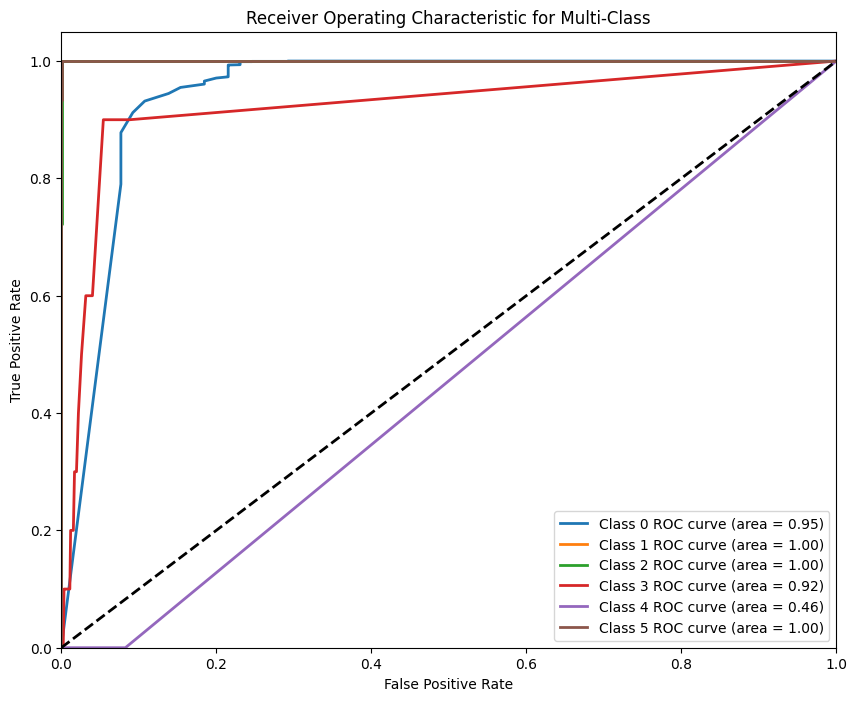

In [204]:

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc='lower right')
plt.show()
